# Handwritten Digits - MNIST GAN First Attempt

Make Your First GAN With PyTorch, 2020

In [1]:
# mount Drive to access data files

# from google.colab import drive
# drive.mount('./mount')

In [2]:
# import libraries

import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas, numpy, random
import matplotlib.pyplot as plt

## Dataset Class

In [3]:
# dataset class

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        # image target (label)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # image data, normalised from 0-255 to 0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        # return label, image data tensor and target tensor
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass

In [4]:
# load data

mnist_dataset = MnistDataset('../mnist/mnist_train.csv')

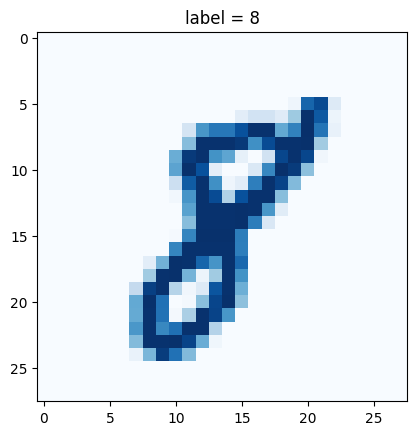

In [5]:
# check data contains images

mnist_dataset.plot_image(17)

## Data Functions

In [6]:
# function to generate uniform random data

def generate_random(size):
    random_data = torch.rand(size)
    # random_data = torch.randint(0,256,(size,))
    # random_data = random_data.float()
    return random_data

generate_random(784)

tensor([2.4206e-01, 2.0652e-01, 1.9107e-01, 6.3453e-01, 5.8001e-02, 5.1166e-01,
        1.2368e-01, 2.6196e-01, 5.9772e-01, 9.9992e-01, 6.7624e-01, 4.3273e-01,
        9.6520e-01, 6.6333e-01, 1.1667e-01, 5.5487e-01, 3.3842e-01, 5.7008e-02,
        9.7356e-01, 6.5006e-01, 3.1615e-01, 4.1910e-01, 5.2238e-01, 2.6390e-01,
        5.5670e-01, 9.6096e-01, 6.2305e-01, 5.0004e-01, 2.2624e-01, 7.8056e-01,
        2.0124e-01, 4.5435e-03, 6.4972e-02, 7.5198e-01, 3.7138e-01, 1.4993e-01,
        5.3499e-01, 3.8835e-01, 2.1272e-02, 7.0401e-01, 1.1901e-01, 2.1942e-01,
        6.1681e-01, 2.6048e-01, 1.5527e-01, 9.2400e-01, 6.3436e-02, 2.7740e-01,
        3.8057e-01, 6.4674e-01, 3.7643e-01, 9.5501e-01, 2.8578e-01, 5.6536e-01,
        8.3265e-01, 1.4181e-01, 4.3456e-01, 1.5291e-01, 3.0873e-01, 4.8467e-01,
        2.5099e-01, 6.6430e-01, 8.1708e-01, 5.6200e-02, 8.6002e-01, 8.1524e-01,
        3.4416e-01, 6.8928e-01, 3.0287e-01, 3.1819e-01, 4.3066e-01, 7.9179e-01,
        1.5263e-01, 8.1862e-01, 9.3925e-

## Discriminator Network

In [7]:
# discriminator class

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.MSELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

## Test Discriminator

In [8]:
%%time
# test discriminator can separate real data from random noise

D = Discriminator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    # real data
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    # fake data
    D.train(generate_random(784), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: total: 6min 45s
Wall time: 1min 29s


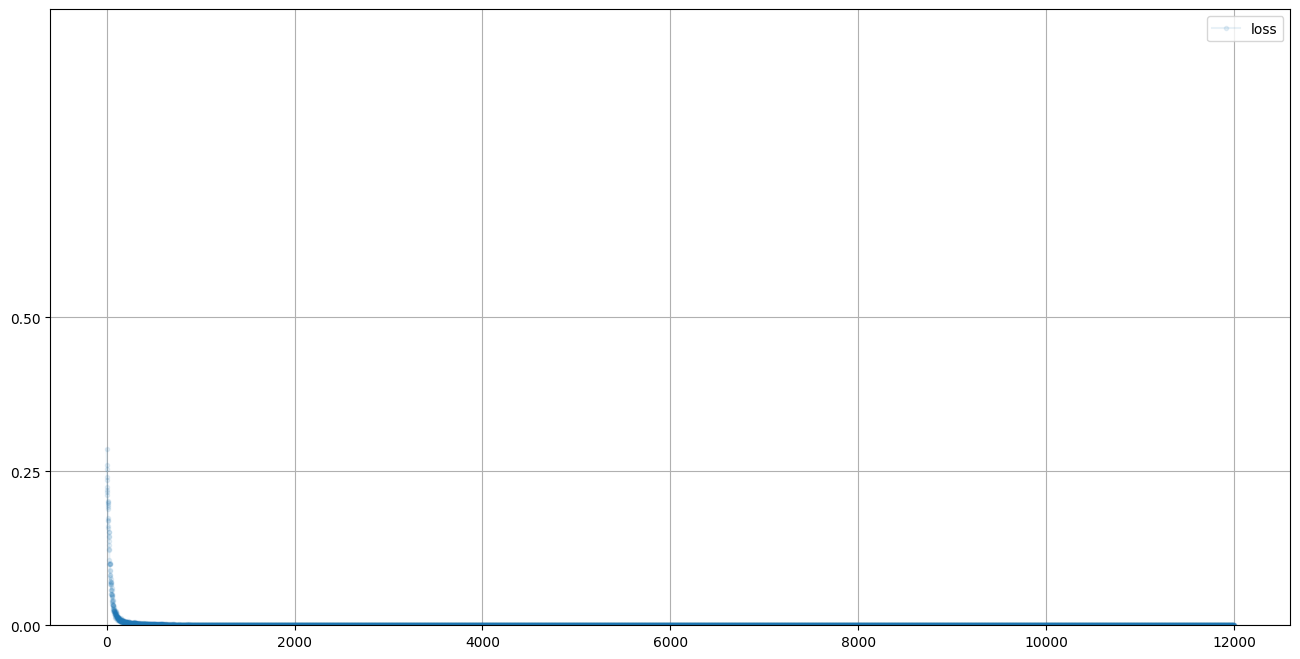

In [9]:
# plot discriminator loss

D.plot_progress()

In [10]:
# manually run discriminator to check it can tell real data from fake

for i in range(4):
  image_data_tensor = mnist_dataset[random.randint(0,60000)][1]
  print( D.forward( image_data_tensor ).item() )
  pass

for i in range(4):
  print( D.forward( generate_random(784) ).item() )
  pass

0.9981613755226135
0.9950807094573975
0.9981241822242737
0.9967095851898193
0.0045149074867367744
0.006159599870443344
0.007154160179197788
0.006367011461406946


## Generator Network

In [11]:
# generator class

class Generator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(1, 200),
            nn.Sigmoid(),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        
        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []
        
        pass
    
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

## Test Generator Output

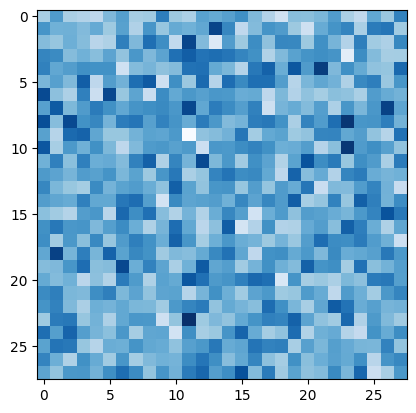

In [12]:
# check the generator output is of the right type and shape

G = Generator()

output = G.forward(generate_random(1))

img = output.detach().numpy().reshape(28,28)

plt.imshow(img, interpolation='none', cmap='Blues')

## Train GAN

In [13]:
%%time 

# create Discriminator and Generator

D = Discriminator()
G = Generator()

# train Discriminator and Generator

for label, image_data_tensor, target_tensor in mnist_dataset:

    # train discriminator on true
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    
    # train discriminator on false
    # use detach() so gradients in G are not calculated
    D.train(G.forward(generate_random(1)).detach(), torch.FloatTensor([0.0]))
    
    # train generator
    G.train(D, generate_random(1), torch.FloatTensor([1.0]))

    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: total: 11min 59s
Wall time: 2min 35s


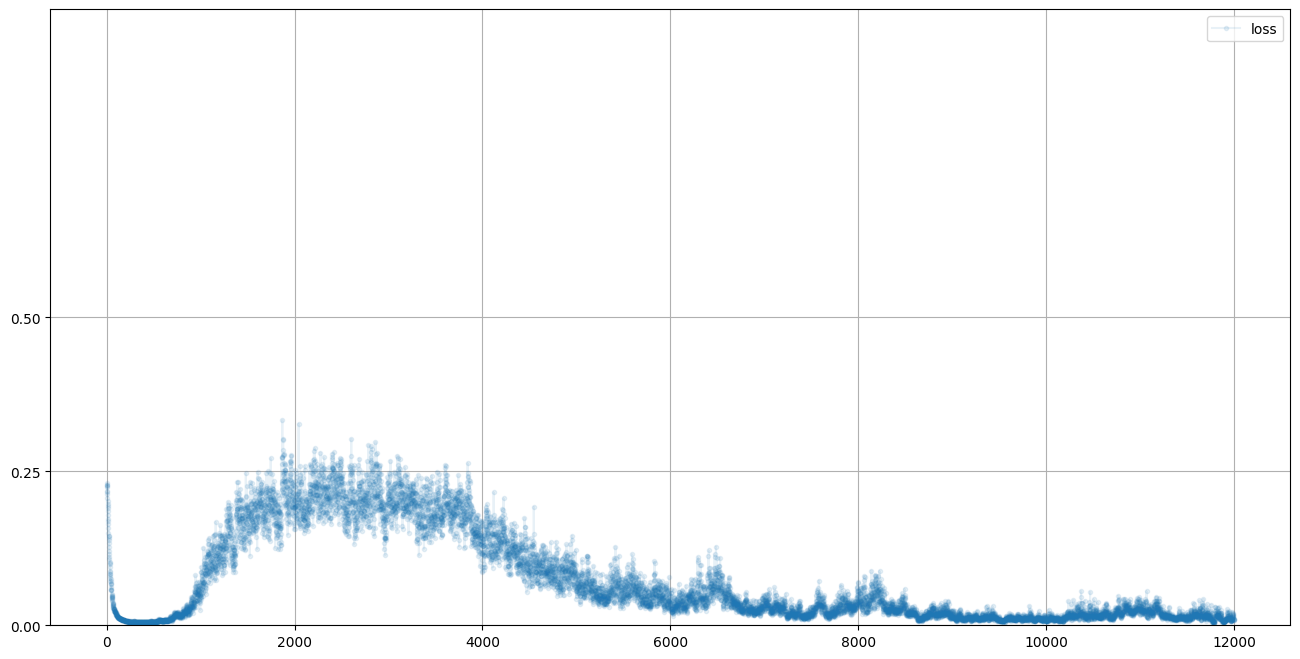

In [18]:
# plot discriminator error

D.plot_progress()

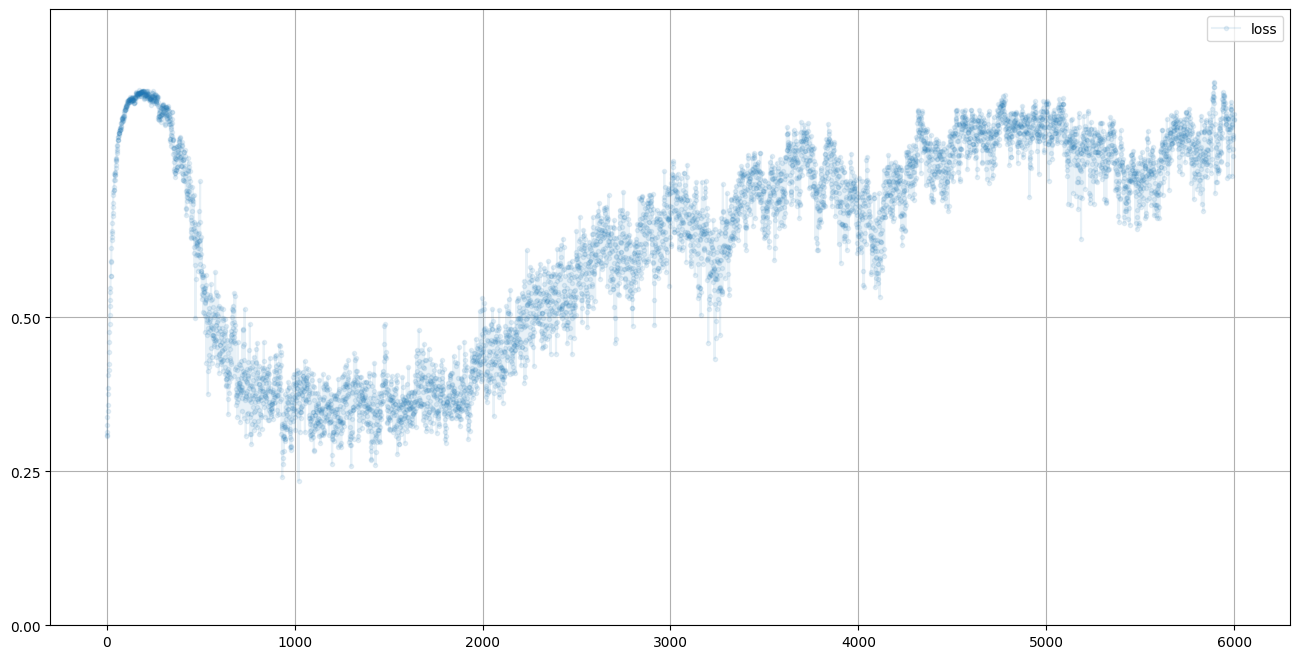

In [19]:
# plot generator error

G.plot_progress()

## Run Generator

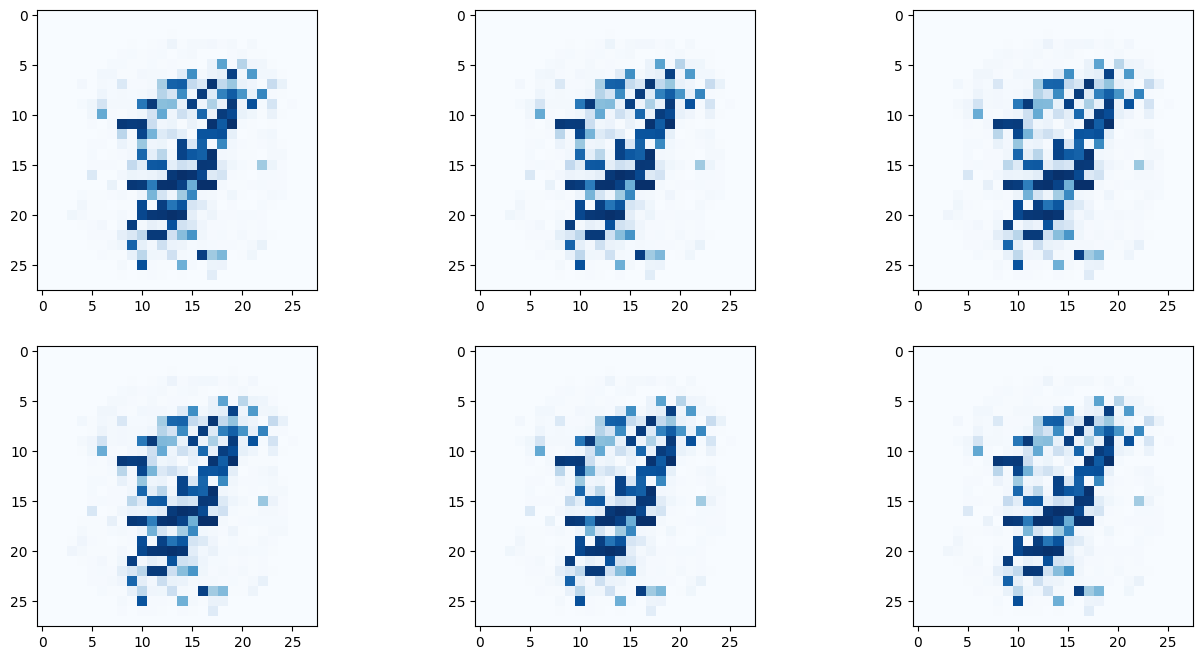

In [20]:
# plot several outputs from the trained generator

# plot a 3 column, 2 row array of generated images
f, axarr = plt.subplots(2,3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(1))
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass